# **Credit Card Approval Detection by Ambika Ajai Singh**
#### **Steps:**
1. Data Collection
2. Data Preparing
3. Data Preprocessing
4. Exploratory Data Analysis
5. Data Transformation
6. Model Building
7. Model Evaluation

In [1]:
# Install Requirements:
# !pip install -r requirements.txt

In [ ]:
# Importing Required Libraries for the Project

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier


from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rcParams

In [3]:
import imblearn
print(imblearn.__version__)

0.7.0


## **Data Collection and Description**

In [4]:
train_df = pd.read_csv("Training Data.csv")

In [5]:
train_df.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,approval
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [6]:
test_df = pd.read_csv("Test Data.csv")

In [7]:
test_df.head()

,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Id                   252000 non-null  int64 
 1   income               252000 non-null  int64 
 2   age                  252000 non-null  int64 
 3   experience           252000 non-null  int64 
 4   married              252000 non-null  object
 5   house_ownership      252000 non-null  object
 6   car_ownership        252000 non-null  object
 7   profession           252000 non-null  object
 8   city                 252000 non-null  object
 9   state                252000 non-null  object
 10  current_job_years    252000 non-null  int64 
 11  current_house_years  252000 non-null  int64 
 12  approval             252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [9]:
train_df.describe()

,Id,income,age,experience,current_job_years,current_house_years,approval
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063863,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [10]:
train_df.isnull().sum()

Id                     0
income                 0
age                    0
experience             0
married                0
house_ownership        0
car_ownership          0
profession             0
city                   0
state                  0
current_job_years      0
current_house_years    0
approval               0
dtype: int64

In [11]:
train_df.describe(include='object')

,married,house_ownership,car_ownership,profession,city,state
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,176000,5957,1259,28400


## **Exploratory Data Analysis**
Extracting Insights using Aesthetic Visualizations

Text(0.5, 1.0, 'Histogram of Predicted Credit Card Approval')

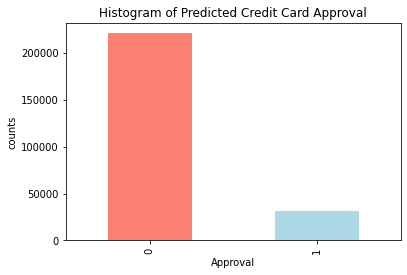

In [12]:
train_df.approval.value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.xlabel('Approval')
plt.ylabel('counts')
plt.title('Histogram of Predicted Credit Card Approval')

In [13]:
categorical_val = []
continous_val = []
for column in train_df.columns:
    print('==============================')
    print(f"{column} : {train_df[column].unique()}")
    if len(train_df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

Id : [     1      2      3 ... 251998 251999 252000]
income : [1303835 7574516 3991815 ... 2843572 4522448 9070230]
age : [23 40 66 41 47 64 58 33 24 78 22 28 57 48 39 72 56 54 50 35 76 38 31 52
 59 21 26 55 45 77 71 63 30 25 73 75 27 74 67 46 68 36 79 42 60 32 65 49
 61 29 37 69 62 53 70 34 43 44 51]
experience : [ 3 10  4  2 11  0 14 17 12  7  9  6  8  1 13 19 15 20  5 16 18]
married : ['single' 'married']
house_ownership : ['rented' 'norent_noown' 'owned']
car_ownership : ['no' 'yes']
profession : ['Mechanical_engineer' 'Software_Developer' 'Technical_writer'
 'Civil_servant' 'Librarian' 'Economist' 'Flight_attendant' 'Architect'
 'Designer' 'Physician' 'Financial_Analyst' 'Air_traffic_controller'
 'Politician' 'Police_officer' 'Artist' 'Surveyor' 'Design_Engineer'
 'Chemical_engineer' 'Hotel_Manager' 'Dentist' 'Comedian'
 'Biomedical_Engineer' 'Graphic_Designer' 'Computer_hardware_engineer'
 'Petroleum_Engineer' 'Secretary' 'Computer_operator'
 'Chartered_Accountant' 'Technician' '

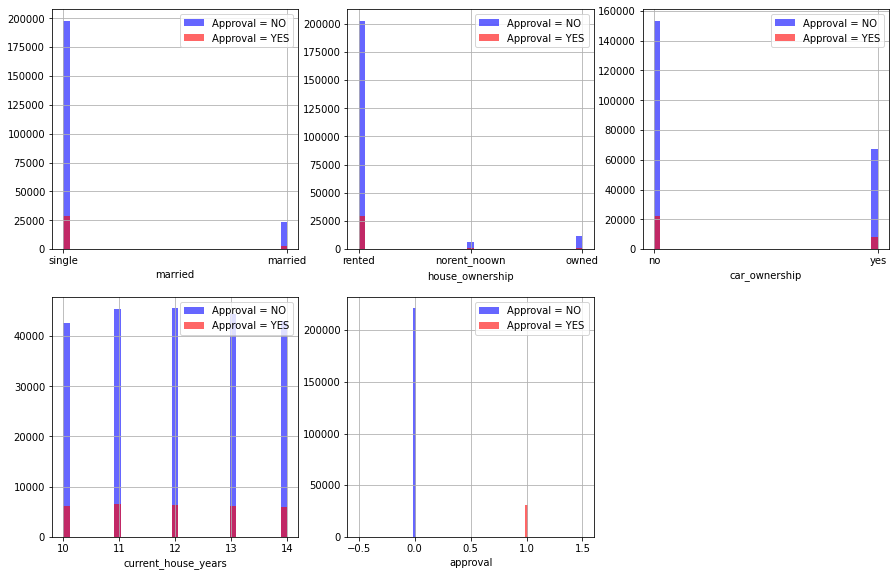

In [14]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    train_df[train_df["approval"] == 0][column].hist(bins=35, color='blue', label='Approval = NO', alpha=0.6)
    train_df[train_df["approval"] == 1][column].hist(bins=35, color='red', label='Approval = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

<AxesSubplot:title={'center':'Correlation with target column'}>

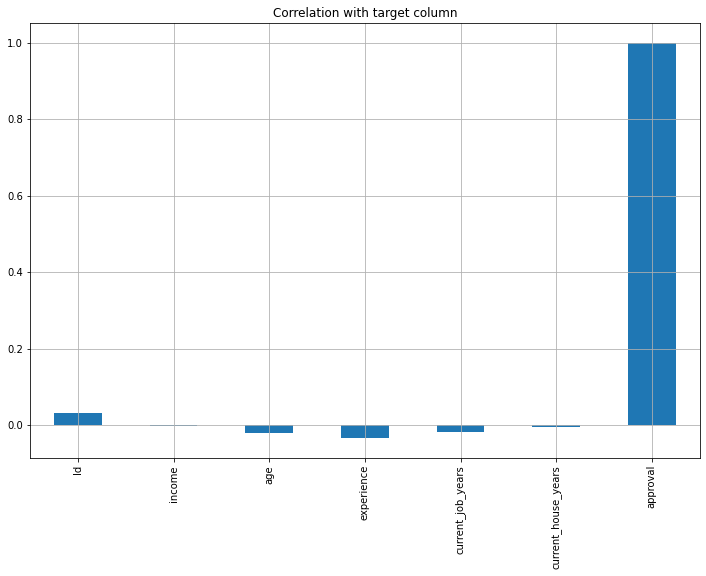

In [15]:
train_df.corrwith(train_df.approval).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target column")

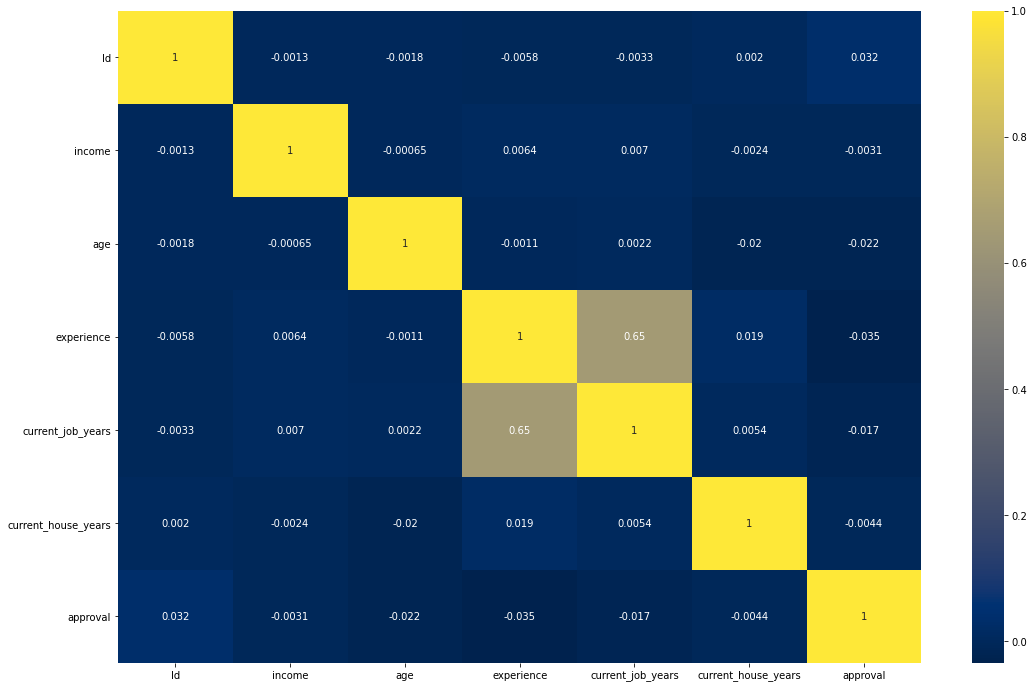

In [16]:
plt.figure(figsize=(18,12))
corr = train_df.corr()
sns.heatmap(corr,annot=True,cmap = plt.cm.cividis)
plt.show()

<Figure size 864x720 with 0 Axes>

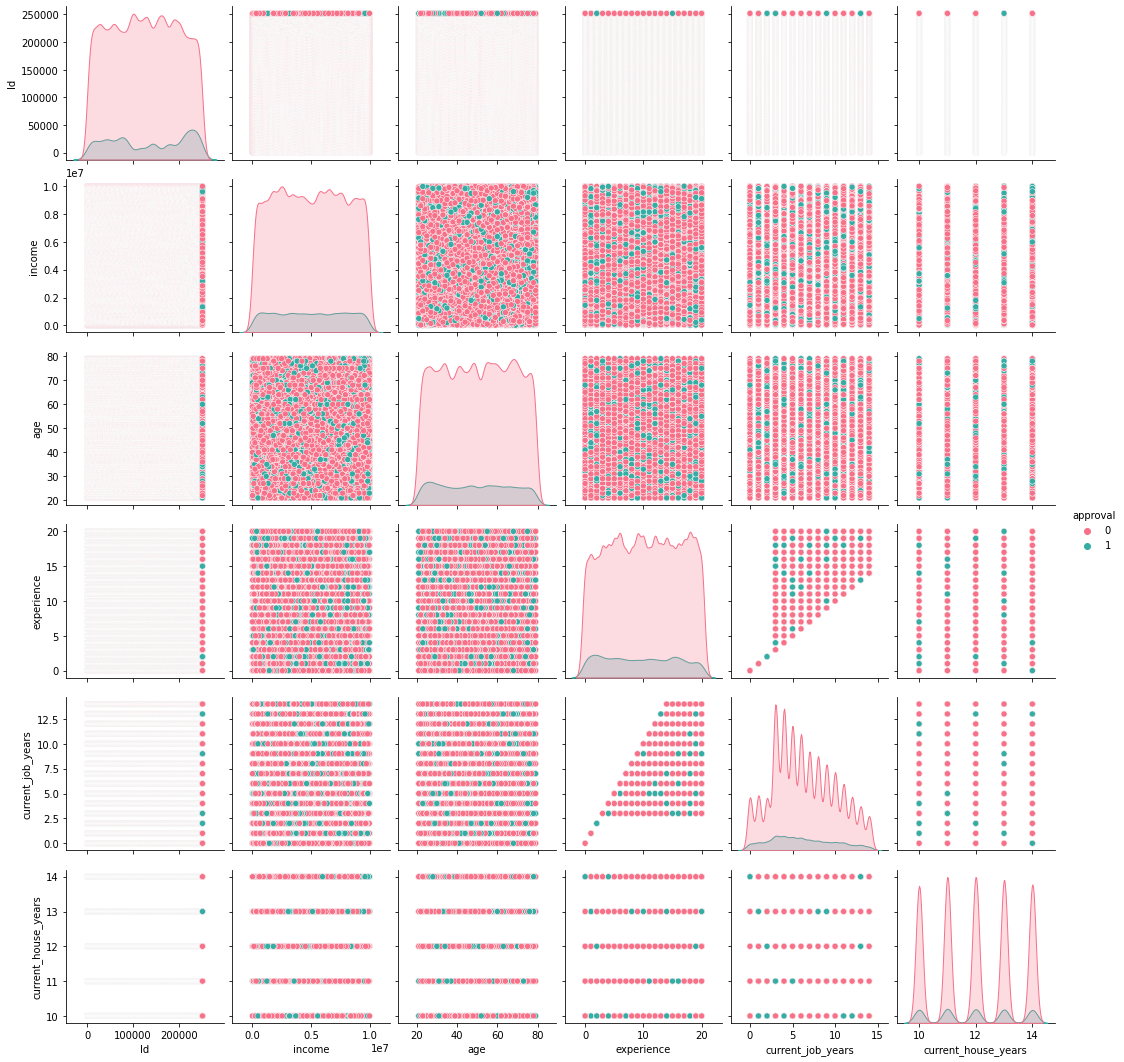

In [17]:
plt.figure(figsize = (12,10))
sns.pairplot(train_df,hue='approval',palette='husl') # markers=["o", "s"])
plt.show()

## **Data Transformation** (Categorical - Numerical)

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Id                   252000 non-null  int64 
 1   income               252000 non-null  int64 
 2   age                  252000 non-null  int64 
 3   experience           252000 non-null  int64 
 4   married              252000 non-null  object
 5   house_ownership      252000 non-null  object
 6   car_ownership        252000 non-null  object
 7   profession           252000 non-null  object
 8   city                 252000 non-null  object
 9   state                252000 non-null  object
 10  current_job_years    252000 non-null  int64 
 11  current_house_years  252000 non-null  int64 
 12  approval             252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [19]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   28000 non-null  int64 
 1   income               28000 non-null  int64 
 2   age                  28000 non-null  int64 
 3   experience           28000 non-null  int64 
 4   married              28000 non-null  object
 5   house_ownership      28000 non-null  object
 6   car_ownership        28000 non-null  object
 7   profession           28000 non-null  object
 8   city                 28000 non-null  object
 9   state                28000 non-null  object
 10  current_job_years    28000 non-null  int64 
 11  current_house_years  28000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 2.6+ MB


In [20]:
train_df.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,approval
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [21]:
test_df.head()

,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [22]:
train_df['married'].unique()

array(['single', 'married'], dtype=object)

In [23]:
mapping = {'single':'0', 'married':'1'}
train_df['married'] = train_df['married'].map(mapping)

In [24]:
test_df['married'] = test_df['married'].map(mapping)

In [25]:
train_df['house_ownership'].unique()

array(['rented', 'norent_noown', 'owned'], dtype=object)

In [26]:
mapping = {'owned':'2','rented':'1','norent_noown':'0'}
train_df['house_ownership'] = train_df['house_ownership'].map(mapping)

In [27]:
test_df['house_ownership'] = test_df['house_ownership'].map(mapping)

In [28]:
train_df['car_ownership'].unique()

array(['no', 'yes'], dtype=object)

In [29]:
train_df['car_ownership'] = train_df['car_ownership'].replace({'no':'0', 'yes':'1'})

In [30]:
test_df['car_ownership'] = test_df['car_ownership'].replace({'no':'0', 'yes':'1'})

##### **Performing One Hot Encoding on Column Professsion.**

In [31]:
train_df['profession'].value_counts().head(30)

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

In [32]:
top_30_train = [x for x in train_df['profession'].value_counts().sort_values(ascending=False).head(30).index]

In [33]:
for label in top_30_train:
    train_df[label] = np.where(train_df['profession'] == label, 1,0)
train_df[['profession']+top_30_train].head(10)

,profession,Physician,Statistician,Web_designer,Psychologist,Computer_hardware_engineer,Drafter,Magistrate,Fashion_Designer,Air_traffic_controller,...,Software_Developer,Petroleum_Engineer,Police_officer,Computer_operator,Politician,Microbiologist,Technician,Artist,Lawyer,Consultant
0,Mechanical_engineer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Software_Developer,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Technical_writer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Software_Developer,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,Civil_servant,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Civil_servant,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Librarian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Economist,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Flight_attendant,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Architect,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
top_30_test = [x for x in test_df['profession'].value_counts().sort_values(ascending=False).head(30).index] 

In [35]:
for label in top_30_test:
    test_df[label] = np.where(test_df['profession'] == label, 1,0)
test_df[['profession']+top_30_test].head(10)

,profession,Computer hardware engineer,Statistician,Physician,Mechanical engineer,Technical writer,Psychologist,Web designer,Comedian,Hotel Manager,...,Fashion Designer,Microbiologist,Chemical engineer,Consultant,Secretary,Technology specialist,Aviator,Librarian,Firefighter,Dentist
0,Geologist,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Firefighter,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Lawyer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Analyst,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Comedian,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,Economist,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Artist,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Flight attendant,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Secretary,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,Engineer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
train_df['city'].nunique()

317

In [37]:
train_df['city'].value_counts().head(30)

Vijayanagaram      1259
Bhopal             1208
Bulandshahr        1185
Saharsa[29]        1180
Vijayawada         1172
Srinagar           1136
Indore             1130
Hajipur[31]        1098
New_Delhi          1098
Satara             1096
Navi_Mumbai        1084
Jorhat             1079
Ongole             1067
Bellary            1065
Erode[17]          1064
Giridih            1064
Hospet             1058
Jodhpur            1056
Khammam            1051
Danapur            1037
Bareilly           1036
Bidhannagar        1033
Kolkata            1033
Satna              1028
Mango              1016
Howrah             1016
Agra               1012
Thanjavur          1003
Haridwar           1001
Anantapuram[24]     994
Name: city, dtype: int64

In [38]:
# Trasforming Variable City into Numerical Values taking only the most risky cities which are more prone to credit card fradualent.
# The reason for taking only top 30 cities are, since performing one hot encoding to
# all the cities can lead to curse of dimenrsionality and it will increase the time complexity.

top_30 = [x for x in train_df['city'].value_counts().sort_values(ascending = False).head(30).index]

In [39]:
for label in top_30:
    train_df[label] = np.where(train_df['city'] == label ,1,0)
train_df[['city']+top_30].head(50)

,city,Vijayanagaram,Bhopal,Bulandshahr,Saharsa[29],Vijayawada,Srinagar,Indore,Hajipur[31],New_Delhi,...,Bareilly,Bidhannagar,Kolkata,Satna,Mango,Howrah,Agra,Thanjavur,Haridwar,Anantapuram[24]
0,Rewa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parbhani,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Alappuzha,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bhubaneswar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Tiruchirappalli[10],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Jalgaon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Tiruppur,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Jamnagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Kota[6],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Karimnagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
top_30_test = [x for x in test_df['city'].value_counts().sort_values(ascending = False).head(30).index]

In [41]:
for label in top_30_test:
    test_df[label] = np.where(test_df['city'] == label ,1,0)
test_df[['city']+top_30_test].head(50)

,city,Saharsa[29],Vijayanagaram,Bulandshahr,Danapur,Kolkata,Ongole,Satara,Bhopal,Bidhannagar,...,Ambarnath,Nandyal,Munger,Srinagar,Aizawl,Panihati,Vadodara,Muzaffarpur,Kavali,Vellore
0,Malda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Jalna,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Thane,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Latur,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Berhampore,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Ramgarh,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Pallavaram,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Yamunanagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Anand,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Nandyal,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [42]:
train_df['state'].nunique()

29

In [43]:
train_df['state'].value_counts()

Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: state, dtype: int64

In [44]:
# In the case of State we have direct access the state codes in order to convert the column.

train_df['state'] = train_df['state'].astype('category')
train_df['state'] = train_df['state'].cat.codes
train_df['state']

0         13
1         14
2         12
3         17
4         22
          ..
251995    28
251996    13
251997    14
251998    18
251999    22
Name: state, Length: 252000, dtype: int8

In [45]:
test_df['state'] = test_df['state'].astype('category')
test_df['state'] = test_df['state'].cat.codes
test_df['state']

0        28
1        14
2        14
3        14
4        28
         ..
27995     0
27996    13
27997    14
27998     4
27999    14
Name: state, Length: 28000, dtype: int8

In [46]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 73 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Id                          252000 non-null  int64 
 1   income                      252000 non-null  int64 
 2   age                         252000 non-null  int64 
 3   experience                  252000 non-null  int64 
 4   married                     252000 non-null  object
 5   house_ownership             252000 non-null  object
 6   car_ownership               252000 non-null  object
 7   profession                  252000 non-null  object
 8   city                        252000 non-null  object
 9   state                       252000 non-null  int8  
 10  current_job_years           252000 non-null  int64 
 11  current_house_years         252000 non-null  int64 
 12  approval                    252000 non-null  int64 
 13  Physician                   2

In [47]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 72 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          28000 non-null  int64 
 1   income                      28000 non-null  int64 
 2   age                         28000 non-null  int64 
 3   experience                  28000 non-null  int64 
 4   married                     28000 non-null  object
 5   house_ownership             28000 non-null  object
 6   car_ownership               28000 non-null  object
 7   profession                  28000 non-null  object
 8   city                        28000 non-null  object
 9   state                       28000 non-null  int8  
 10  current_job_years           28000 non-null  int64 
 11  current_house_years         28000 non-null  int64 
 12  Computer hardware engineer  28000 non-null  int32 
 13  Statistician                28000 non-null  in

In [48]:
# Dropping Unnecessary Columns

columns=['Id','city','profession']
train = train_df.drop(columns=columns, axis = 1)

In [49]:
columns=['id','city','profession']
test = test_df.drop(columns=columns)

### **Seperating the Variables..**

In [50]:
target_var = train['approval']
train_var = train.drop(['approval'],axis=1)
test_set = test

### **Resampling:** 
- The Reason for resampling our data is to make sure that the data is balanced.
- We will use the imblearn library to perform the resampling.
- since at the start we have seen the target variable was imbalanced, where the Approval class 1 feature rows were high in number than 0.



In [51]:
from imblearn.over_sampling import SMOTE
x_resample,y_resample = SMOTE().fit_resample(train_var,target_var.values.ravel())
print(x_resample.shape)
print(y_resample.shape)

(442008, 69)
(442008,)


In [52]:
print("Target_var Before Resampling:")
print(target_var.value_counts())
print("Target_var After Resampling:")
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Target_var Before Resampling:
0    221004
1     30996
Name: approval, dtype: int64
Target_var After Resampling:
1    221004
0    221004
Name: 0, dtype: int64


### **Splitting the data into Training and Test Data**

In [53]:
X_train,X_test,y_train,y_test = train_test_split(x_resample,y_resample,test_size = 0.3, random_state=0)

In [54]:
type(X_train),type(X_test),type(y_train),type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

In [55]:
y_test = y_test.squeeze()
type(y_test)

pandas.core.series.Series

In [56]:
y_train = y_train.squeeze()
type(y_train)

pandas.core.series.Series

### **Normalisation of the Data**

In [57]:
se =StandardScaler()
normalised_X_train = se.fit_transform(X_train)
normalised_X_test = se.transform(X_test)
normalised_test_data = se.transform(test_set)

In [58]:
Q = normalised_X_train
W = normalised_X_test

## **Model Building:**
- The most important step is to build the model.
- choosing a best model for out data, depends on various factors/metrics such as \
accuracy, recall, precision, f1 score, etc.
- In this case we are trying to implenmet 4 models and we are going to evaluate all the models, how they are performing and we will select the best model.
- **DecisionTree, K-Nearest Neighbor.**

In [59]:
# Function to calculate the accuracy of the model.

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

### **KNN Classifier**

In [61]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(Q, y_train)

print_score(neigh, Q, y_train, W, y_test, train=True)
print_score(neigh, Q, y_train, W, y_test, train=False)

Train Result:
Accuracy Score: 92.76%
_______________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy      macro avg  \
precision       0.954601       0.903638  0.927558       0.929119   
recall          0.897566       0.957452  0.927558       0.927509   
f1-score        0.925205       0.929767  0.927558       0.927486   
support    154450.000000  154955.000000  0.927558  309405.000000   

            weighted avg  
precision       0.929078  
recall          0.927558  
f1-score        0.927490  
support    309405.000000  
_______________________________________________
Confusion Matrix: 
 [[138629  15821]
 [  6593 148362]]

Test Result:
Accuracy Score: 90.90%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.936158      0.884867  0.909029       0.910512       0.910610
recall         0.878670      0.939621  0.909029  

In [62]:
knn_pred = neigh.predict(W)

In [63]:
print(confusion_matrix(y_test, knn_pred))

[[58479  8075]
 [ 3988 62061]]


In [ ]:
# plt.figure(figsize=(18,12))
# plot_confusion_matrix(neigh, W, y_test)
# plt.xlabel("Predicted Label") 
# plt.ylabel("Actual Label")
# plt.show()

In [ ]:
# print(recall_score(y_test,knn_pred))

In [ ]:
# print(precision_score(y_test,knn_pred))

In [ ]:
# print(f1_score(y_test,knn_pred))

In [65]:
#Saving the model
from joblib import Parallel, delayed
import joblib

# Save the model as a pickle in a file
joblib.dump(neigh, 'knn.pkl')
 

['knn.pkl']

### **Decision Tree Classifier**

In [ ]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(Q, y_train)

print_score(dt_clf, Q, y_train, W, y_test, train=True)
print_score(dt_clf, Q, y_train, W, y_test, train=False)

Train Result:
Accuracy Score: 95.75%
_______________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy      macro avg  \
precision       0.999859       0.921914  0.957522       0.960886   
recall          0.915034       0.999871  0.957522       0.957452   
f1-score        0.955568       0.959311  0.957522       0.957439   
support    154450.000000  154955.000000  0.957522  309405.000000   

            weighted avg  
precision       0.960823  
recall          0.957522  
f1-score        0.957442  
support    309405.000000  
_______________________________________________
Confusion Matrix: 
 [[141327  13123]
 [    20 154935]]

Test Result:
Accuracy Score: 91.45%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.956471      0.879385  0.914549       0.917928       0.918075
recall         0.869309      0.960136  0.914549  

In [ ]:
dt = DecisionTreeClassifier()
dt_model = dt.fit(Q, y_train)

In [ ]:
print("The Training accuracy using Decision tree regression is:", dt_model.score(Q, y_train))
print("The Testing Accuracy using Decision tree is:", dt_model.score(W, y_test))

The Training accuracy using Logistic regression is: 0.9575216948659524
The Testing Accuracy using Logistic Regression is: 0.9143684532024162


In [ ]:
dt_pred = dt_model.predict(W)

In [ ]:
print(confusion_matrix(y_test, dt_pred))

[[57835  8719]
 [ 2636 63413]]


<Figure size 1296x864 with 0 Axes>

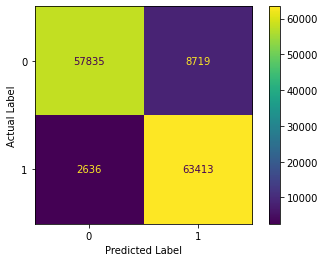

In [ ]:
plt.figure(figsize=(18,12))
plot_confusion_matrix(dt_model, W, y_test)
plt.xlabel("Predicted Label") 
plt.ylabel("Actual Label") 
plt.show()

In [ ]:
print(recall_score(y_test,dt_pred))

0.9600902360368817


In [ ]:
print(precision_score(y_test,dt_pred))

0.8791243830754727


In [ ]:
print(f1_score(y_test,dt_pred))

0.9178251713332513


### **Testing the Data**

In [ ]:
X_test.iloc[4]

income             6025442
age                     51
experience               6
married                  1
house_ownership          1
                    ...   
Mango                    0
Agra                     0
Thanjavur                0
Haridwar                 0
Anantapuram[24]          0
Name: 247039, Length: 69, dtype: object

In [ ]:
new = X_test.iloc[4]

In [ ]:
a = np.asarray(new)
a = a.reshape(1,-1)
p = dt_model.predict(a)

In [ ]:
if (p[0] == 1):
    print("Great! You can trust the person")
else:
    print("Credit Card Should not be Approved.")

Credit Card Should not be Approved.


## **Conclusion**
- **Data Gathering:** Dataset used in this project is the Credit Card Approval Detection Dataset, which was downloaded from Kaggle.
- **Data Pre-processing:** Data was pre-processing (Identifying Null Values, Outliers and Irrelevant data values) by removing the columns that are not required for the analysis.
- **Exploratory Data Analysis** is performed so as to get some insights from the dataset, such as, this step will give us some interesting patterns which can help us get better results while modelling.
- **Data Transformation:** Data transformation is performed so as to convert all our categorical string variables into numerical data, which is also the most important step because the model which we try to build cannot be trained by string values, since the machine cannot interpret the string data types as we convert it into numerical, if possible, depending on the requirement. Problem we even normalize the data, so as to bring all the columns as one scale.
- **Model Building:** OK, here we build our model, using various algorithms chosen depending on the project we are working on, before building our model, we need to make sure that, the data is split into train and test data, and you need to make sure that the test data is kept securely without leaking the test data information to the model, if that happens it might lead to overfitting which can be serious problem in real world applications.
- **Model Evaluation:** So, the model is built and in order to choose the best model, we evaluate our model, using various metrics, such as Accuracy, Recall, Precision, Classification Report, Confusion Matrix, etc.
